## Machine Downtime Optimization

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [3]:
machines_df = pd.read_csv('machines.csv')
machines_df.head(3)

Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure(bar)  \
0  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                    71.04   
1  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                   125.33   
2  31-12-2021  Makino-L3-Unit1-2015     Shopfloor-L3                    71.12   

   Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
0               6.933725                  6.284965                 25.6   
1               4.936892                  6.196733                 35.3   
2               6.839413                  6.655448                 13.1   

   Hydraulic_Oil_Temperature(?C)  Spindle_Bearing_Temperature(?C)  \
0                           46.0                             33.4   
1                           47.4                             34.6   
2                           40.7                             33.0   

   Spindle_Vibration(?m)  Tool_Vibration(?m)  Spindle_Speed(RPM)  \
0                  1.291              26.492             25892.0   
1                  1.382              25.274             19856.0   
2                  1.319              30.608             19851.0   

   Voltage(volts)  Torque(Nm)  Cutting(kN)         Downtime  
0           335.0   24.055326         3.58  Machine_Failure  
1           368.0   14.202890         2.68  Machine_Failure  
2           325.0   24.049267         3.55  Machine_Failure

#### Shape

In [4]:
machines_df.shape

(2500, 16)

#### Columns

In [5]:
machines_df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)',
       'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)',
       'Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

#### Dataframe Info

In [6]:
machines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(?C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(?C)  2493 non-null   float64
 9   Spindle_Vibration(?m)            2489 non-null   float64
 10  Tool_Vibration(?m)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

## Statistics

#### Quantiles

In [7]:
machines_df.describe()

Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
count              2490.000000            2481.000000   
mean                101.409084               4.947058   
std                  30.289301               0.997357   
min                 -14.326454               0.325000   
25%                  76.355000               4.462464   
50%                  96.763486               4.939960   
75%                 126.415727               5.518401   
max                 191.000000              11.350000   

       Air_System_Pressure(bar)  Coolant_Temperature  \
count               2483.000000          2488.000000   
mean                   6.499275            18.559887   
std                    0.407279             8.554480   
min                    5.063480             4.100000   
25%                    6.217987            10.400000   
50%                    6.505191            21.200000   
75%                    6.780550            25.600000   
max                    7.973992            98.200000   

       Hydraulic_Oil_Temperature(?C)  Spindle_Bearing_Temperature(?C)  \
count                    2484.000000                      2493.000000   
mean                       47.618317                        35.063698   
std                         3.768674                         3.764823   
min                        35.200000                        22.600000   
25%                        45.100000                        32.500000   
50%                        47.700000                        35.100000   
75%                        50.100000                        37.600000   
max                        61.400000                        49.500000   

       Spindle_Vibration(?m)  Tool_Vibration(?m)  Spindle_Speed(RPM)  \
count            2489.000000         2489.000000         2494.000000   
mean                1.009334           25.411975        20274.792302   
std                 0.342898            6.437142         3852.660056   
min                -0.461000            2.161000            0.000000   
25%                 0.777000           21.089000        17919.000000   
50%                 1.008000           25.455000        20137.500000   
75%                 1.236000           29.790000        22501.750000   
max                 2.000000           45.726000        27957.000000   

       Voltage(volts)   Torque(Nm)  Cutting(kN)  
count     2494.000000  2479.000000  2493.000000  
mean       348.996792    25.234968     2.782551  
std         45.376024     6.138564     0.616688  
min        202.000000     0.000000     1.800000  
25%        319.000000    21.666115     2.250000  
50%        349.000000    24.647736     2.780000  
75%        380.000000    30.514008     3.270000  
max        479.000000    55.552400     3.930000

#### Correlations

In [8]:
machines_df.corr(numeric_only=True)

Hydraulic_Pressure(bar)  \
Hydraulic_Pressure(bar)                         1.000000   
Coolant_Pressure(bar)                          -0.074700   
Air_System_Pressure(bar)                       -0.029783   
Coolant_Temperature                            -0.111344   
Hydraulic_Oil_Temperature(?C)                   0.008647   
Spindle_Bearing_Temperature(?C)                 0.022488   
Spindle_Vibration(?m)                          -0.006327   
Tool_Vibration(?m)                              0.020943   
Spindle_Speed(RPM)                             -0.120393   
Voltage(volts)                                 -0.004016   
Torque(Nm)                                      0.162734   
Cutting(kN)                                    -0.222217   

                                 Coolant_Pressure(bar)  \
Hydraulic_Pressure(bar)                      -0.074700   
Coolant_Pressure(bar)                         1.000000   
Air_System_Pressure(bar)                     -0.028886   
Coolant_Temperature                           0.008372   
Hydraulic_Oil_Temperature(?C)                 0.001270   
Spindle_Bearing_Temperature(?C)              -0.012733   
Spindle_Vibration(?m)                         0.005644   
Tool_Vibration(?m)                           -0.005033   
Spindle_Speed(RPM)                            0.089118   
Voltage(volts)                                0.031202   
Torque(Nm)                                   -0.103770   
Cutting(kN)                                   0.169249   

                                 Air_System_Pressure(bar)  \
Hydraulic_Pressure(bar)                         -0.029783   
Coolant_Pressure(bar)                           -0.028886   
Air_System_Pressure(bar)                         1.000000   
Coolant_Temperature                              0.048932   
Hydraulic_Oil_Temperature(?C)                   -0.025910   
Spindle_Bearing_Temperature(?C)                  0.009864   
Spindle_Vibration(?m)                            0.008825   
Tool_Vibration(?m)                               0.045552   
Spindle_Speed(RPM)                              -0.001635   
Voltage(volts)                                   0.006661   
Torque(Nm)                                       0.036862   
Cutting(kN)                                     -0.000819   

                                 Coolant_Temperature  \
Hydraulic_Pressure(bar)                    -0.111344   
Coolant_Pressure(bar)                       0.008372   
Air_System_Pressure(bar)                    0.048932   
Coolant_Temperature                         1.000000   
Hydraulic_Oil_Temperature(?C)               0.004399   
Spindle_Bearing_Temperature(?C)            -0.017283   
Spindle_Vibration(?m)                       0.012228   
Tool_Vibration(?m)                          0.006607   
Spindle_Speed(RPM)                          0.073002   
Voltage(volts)                              0.011413   
Torque(Nm)                                 -0.070775   
Cutting(kN)                                 0.097297   

                                 Hydraulic_Oil_Temperature(?C)  \
Hydraulic_Pressure(bar)                               0.008647   
Coolant_Pressure(bar)                                 0.001270   
Air_System_Pressure(bar)                             -0.025910   
Coolant_Temperature                                   0.004399   
Hydraulic_Oil_Temperature(?C)                         1.000000   
Spindle_Bearing_Temperature(?C)                       0.040966   
Spindle_Vibration(?m)                                -0.006140   
Tool_Vibration(?m)                                   -0.015570   
Spindle_Speed(RPM)                                    0.004959   
Voltage(volts)                                        0.026838   
Torque(Nm)                                           -0.006733   
Cutting(kN)                                          -0.019863   

                                 Spindle_Bearing_Temperature(?C)  \
Hydraulic_Pressure(bar)                        

## Data Cleaning

#### Remove Duplicates

In [9]:
machines_df.duplicated().sum()

0

#### Nulls

In [10]:
machines_df.isnull().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(?C)      16
Spindle_Bearing_Temperature(?C)     7
Spindle_Vibration(?m)              11
Tool_Vibration(?m)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

#### Type Conversion

In [11]:
machines_df['Date'] = pd.to_datetime(machines_df['Date'])

#### Unique Values

In [12]:
machines_df['Machine_ID'].unique()

array(['Makino-L1-Unit1-2013', 'Makino-L3-Unit1-2015',
       'Makino-L2-Unit1-2015'], dtype=object)

In [13]:
machines_df['Assembly_Line_No'].unique()

array(['Shopfloor-L1', 'Shopfloor-L3', 'Shopfloor-L2'], dtype=object)

In [14]:
machines_df['Downtime'].unique()

array(['Machine_Failure', 'No_Machine_Failure'], dtype=object)

#### Drop Unwanted Columns

In [15]:
machines_df.drop(columns='Date', inplace=True)

In [16]:
machines_df.head(3)

Machine_ID Assembly_Line_No  Hydraulic_Pressure(bar)  \
0  Makino-L1-Unit1-2013     Shopfloor-L1                    71.04   
1  Makino-L1-Unit1-2013     Shopfloor-L1                   125.33   
2  Makino-L3-Unit1-2015     Shopfloor-L3                    71.12   

   Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
0               6.933725                  6.284965                 25.6   
1               4.936892                  6.196733                 35.3   
2               6.839413                  6.655448                 13.1   

   Hydraulic_Oil_Temperature(?C)  Spindle_Bearing_Temperature(?C)  \
0                           46.0                             33.4   
1                           47.4                             34.6   
2                           40.7                             33.0   

   Spindle_Vibration(?m)  Tool_Vibration(?m)  Spindle_Speed(RPM)  \
0                  1.291              26.492             25892.0   
1                  1.382              25.274             19856.0   
2                  1.319              30.608             19851.0   

   Voltage(volts)  Torque(Nm)  Cutting(kN)         Downtime  
0           335.0   24.055326         3.58  Machine_Failure  
1           368.0   14.202890         2.68  Machine_Failure  
2           325.0   24.049267         3.55  Machine_Failure

## EDA

Columns : 'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)'  'Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)',
       'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m    'Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volt     'Torque(m)', 'Cutting(kN)'

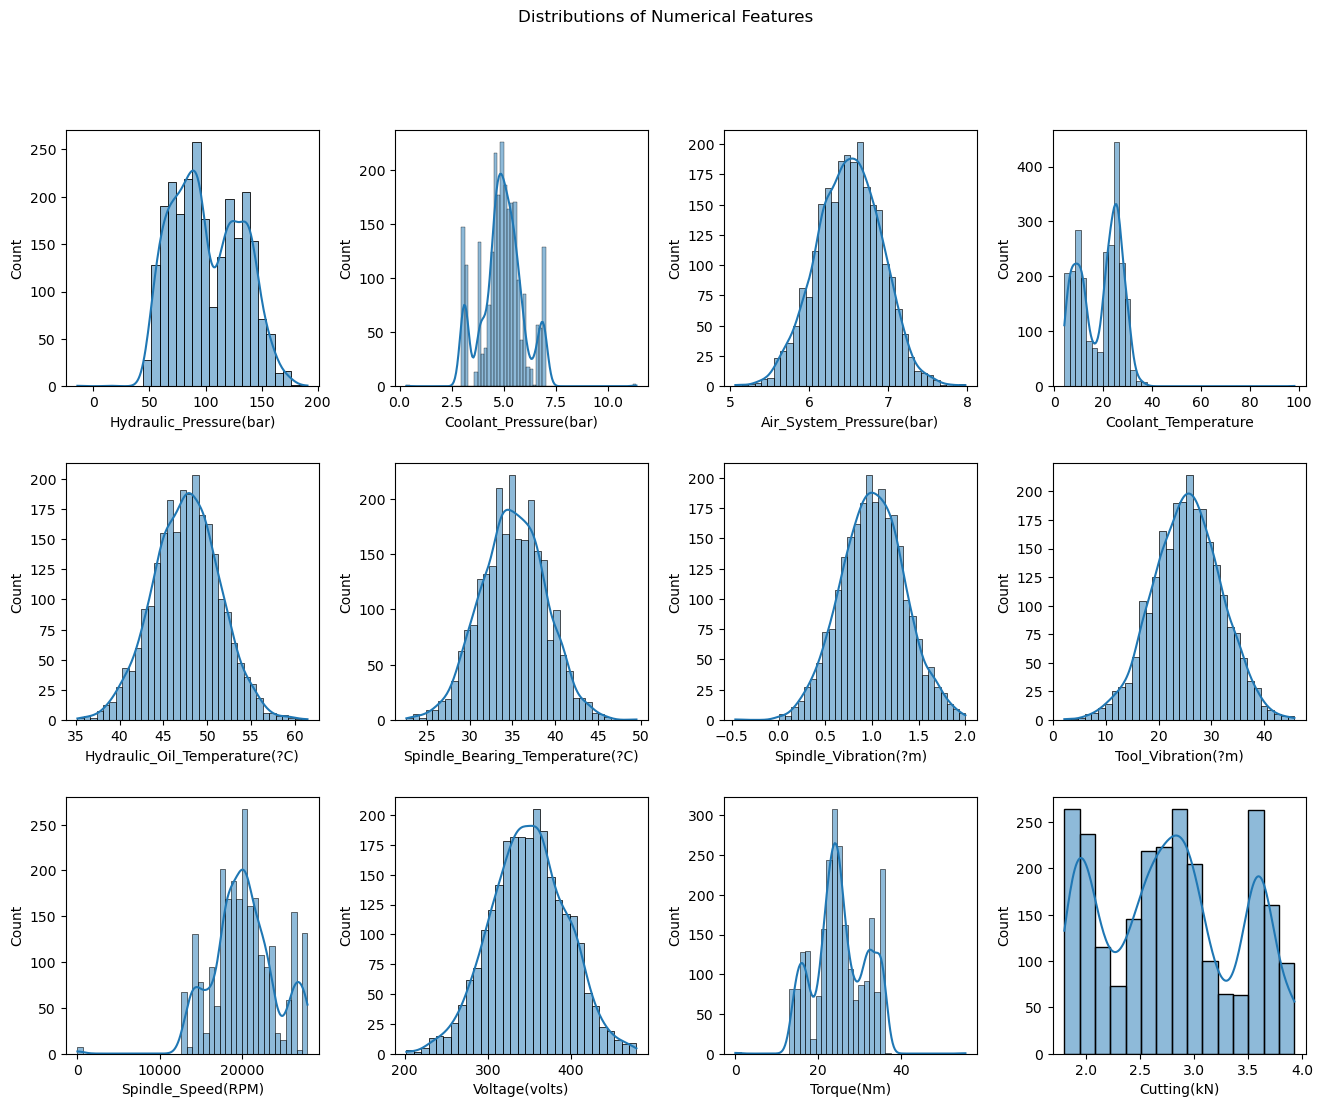

In [17]:
plt.subplots(3,4,figsize=(16,12))
plt.subplots_adjust(wspace=0.3,hspace=0.3)

columns = ['Hydraulic_Pressure(bar)','Coolant_Pressure(bar)', 'Air_System_Pressure(bar)','Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)',
    'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)','Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)','Torque(Nm)','Cutting(kN)']

k = 1
for i in columns:
    plt.subplot(3,4,k)
    sns.histplot(x = i, data = machines_df, kde = True)
    k += 1

plt.suptitle('Distributions of Numerical Features')
plt.show()

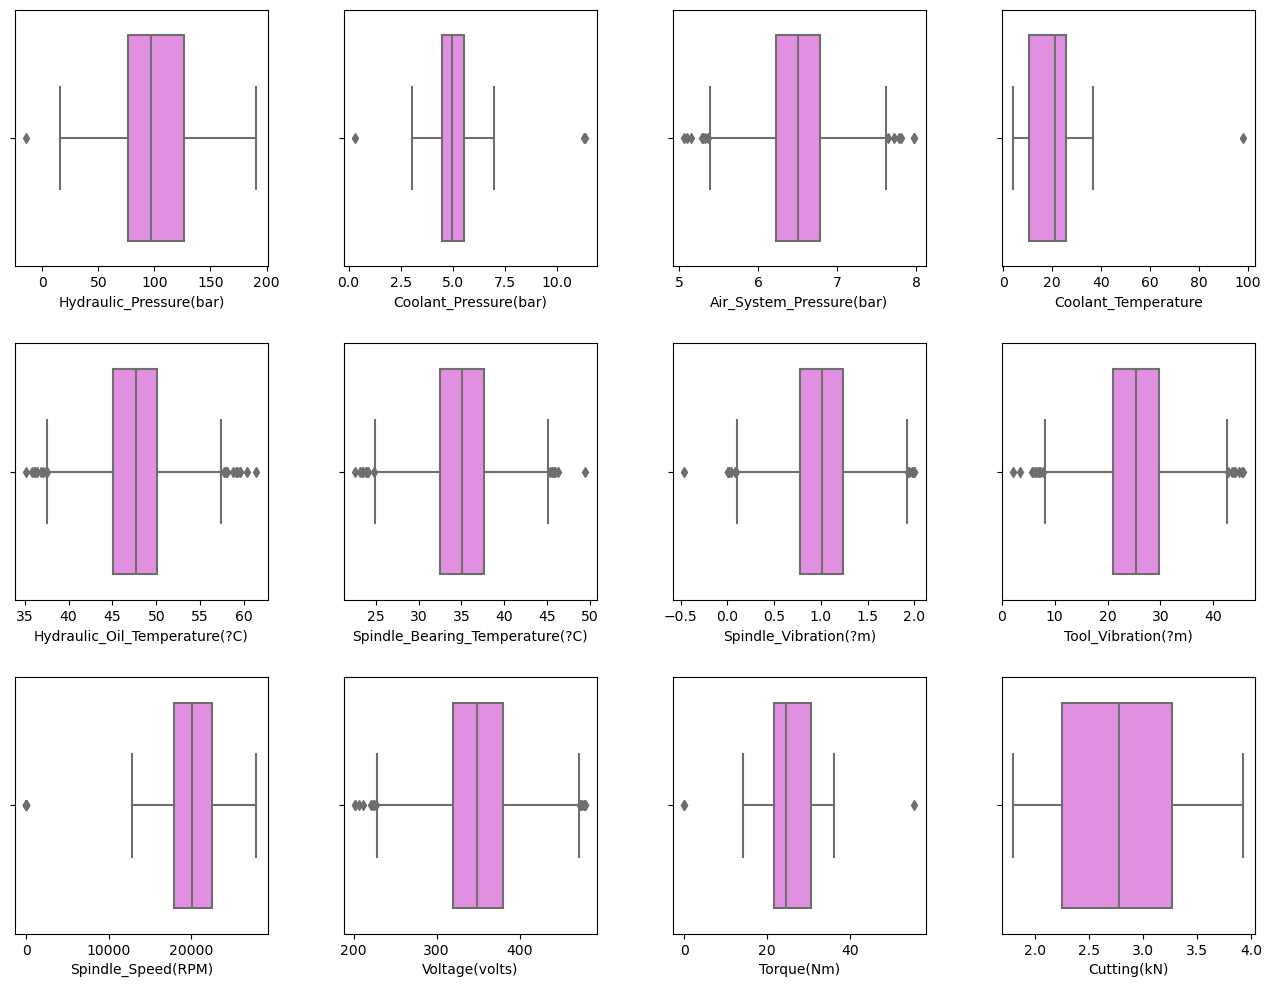

In [18]:
plt.subplots(3,4,figsize=(16,12))
plt.subplots_adjust(wspace=0.3,hspace=0.3)

columns = ['Hydraulic_Pressure(bar)','Coolant_Pressure(bar)', 'Air_System_Pressure(bar)','Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)',
    'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)','Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)','Torque(Nm)','Cutting(kN)']

k = 1
for i in columns:
    plt.subplot(3,4,k)
    sns.boxplot(x = i, data = machines_df, color='violet')
    k += 1

plt.show()

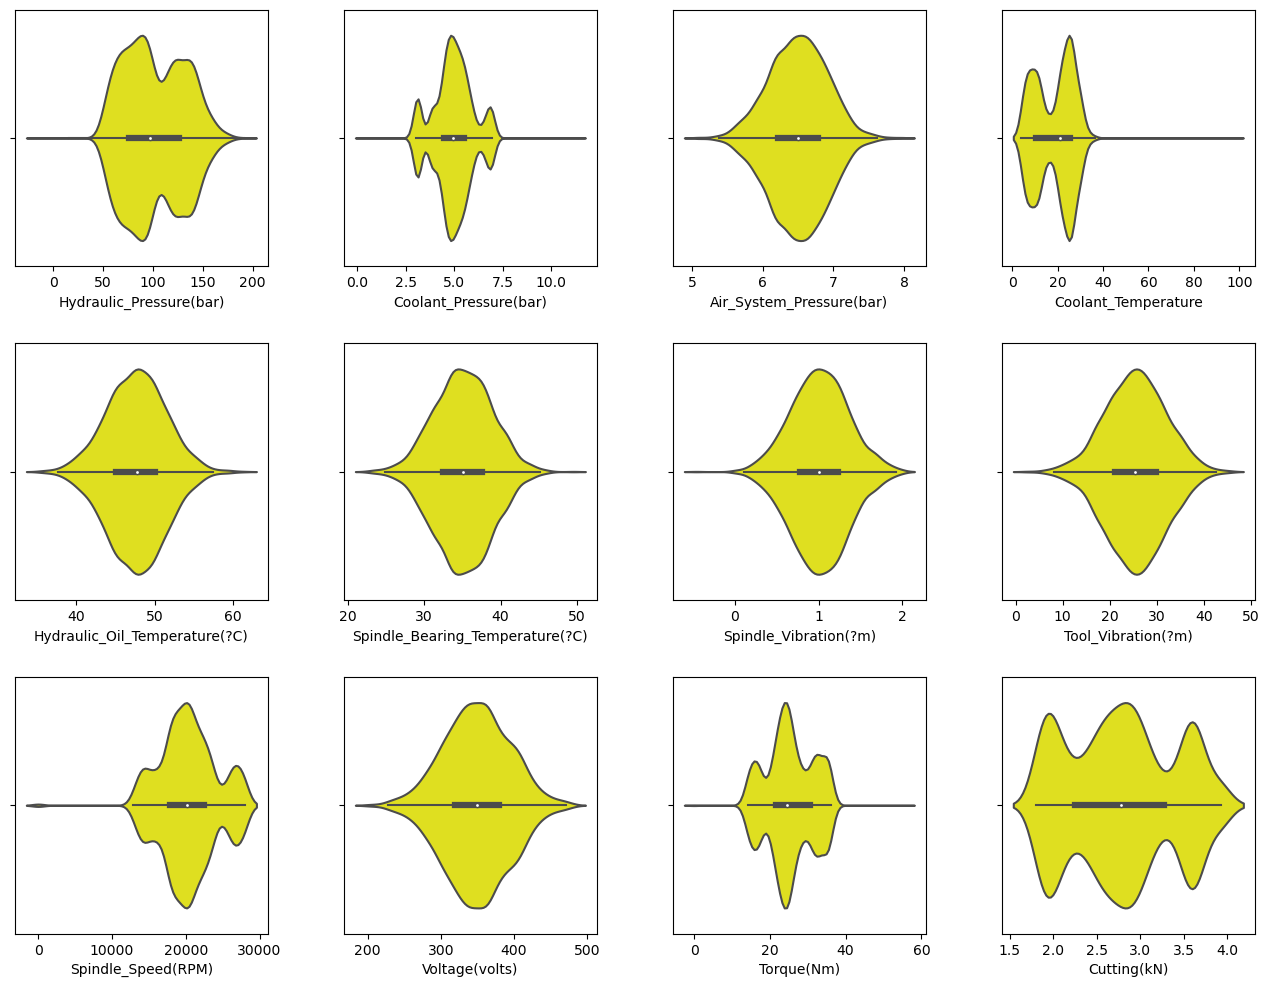

In [19]:
plt.subplots(3,4,figsize=(16,12))
plt.subplots_adjust(wspace=0.3,hspace=0.3)

columns = ['Hydraulic_Pressure(bar)','Coolant_Pressure(bar)', 'Air_System_Pressure(bar)','Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)',
    'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)','Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)','Torque(Nm)','Cutting(kN)']

k = 1
for i in columns:
    plt.subplot(3,4,k)
    sns.violinplot(x = i, data = machines_df, color='yellow')
    k += 1

plt.show()

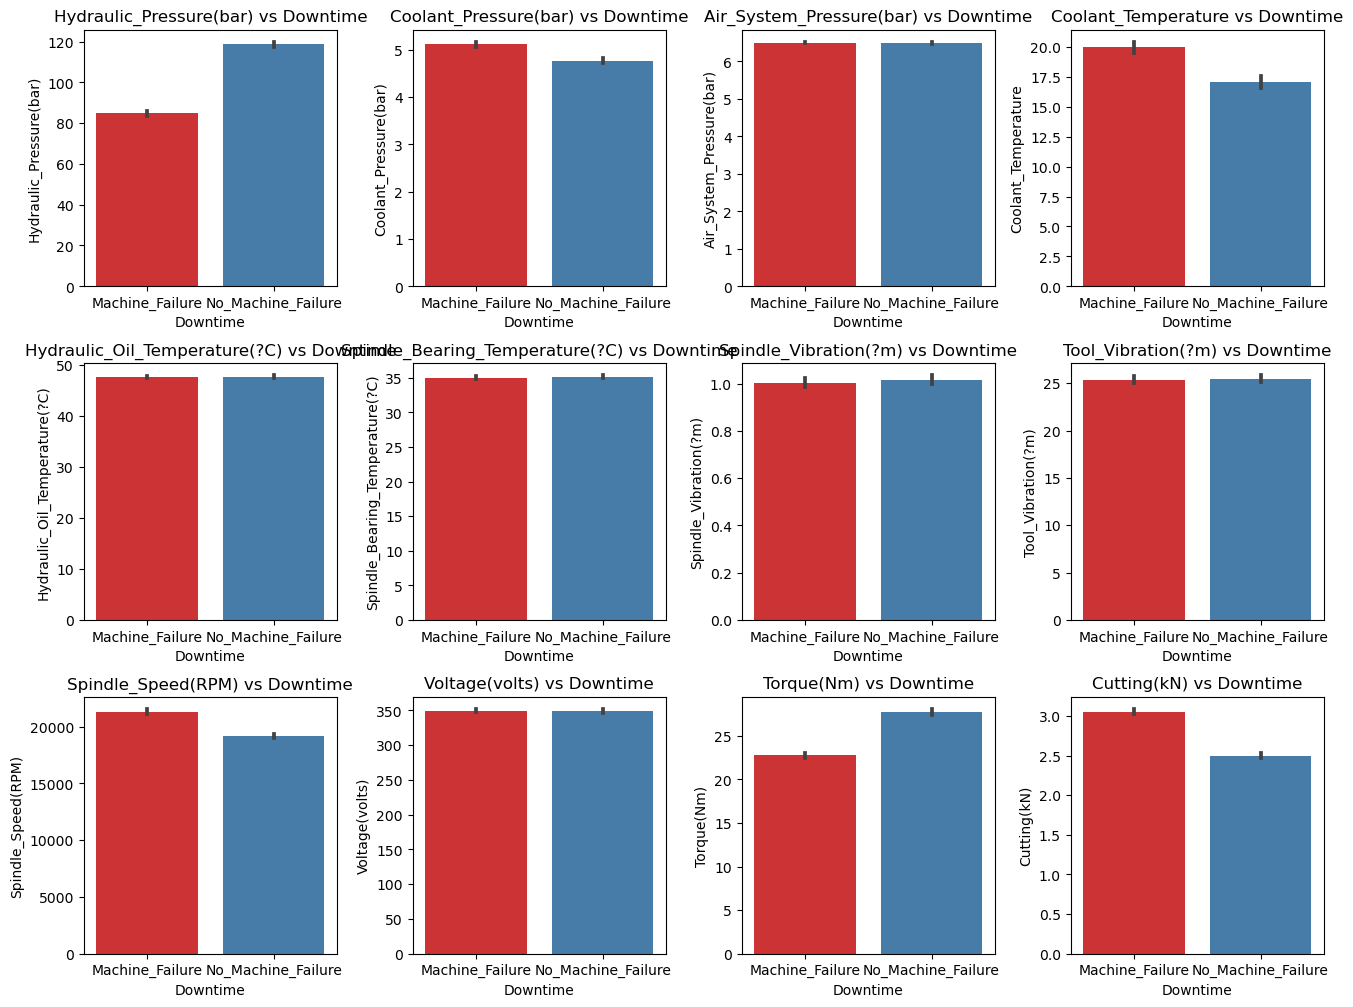

In [20]:
plt.subplots(3,4,figsize=(16,12))
plt.subplots_adjust(wspace=0.3,hspace=0.3)

columns = ['Hydraulic_Pressure(bar)','Coolant_Pressure(bar)', 'Air_System_Pressure(bar)','Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)',
    'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)','Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)','Torque(Nm)','Cutting(kN)']

k = 1
for i in columns:
    plt.subplot(3,4,k)
    sns.barplot(y = i, x = 'Downtime', data = machines_df, palette='Set1')
    plt.title(f'{i} vs Downtime')
    k += 1

plt.show()

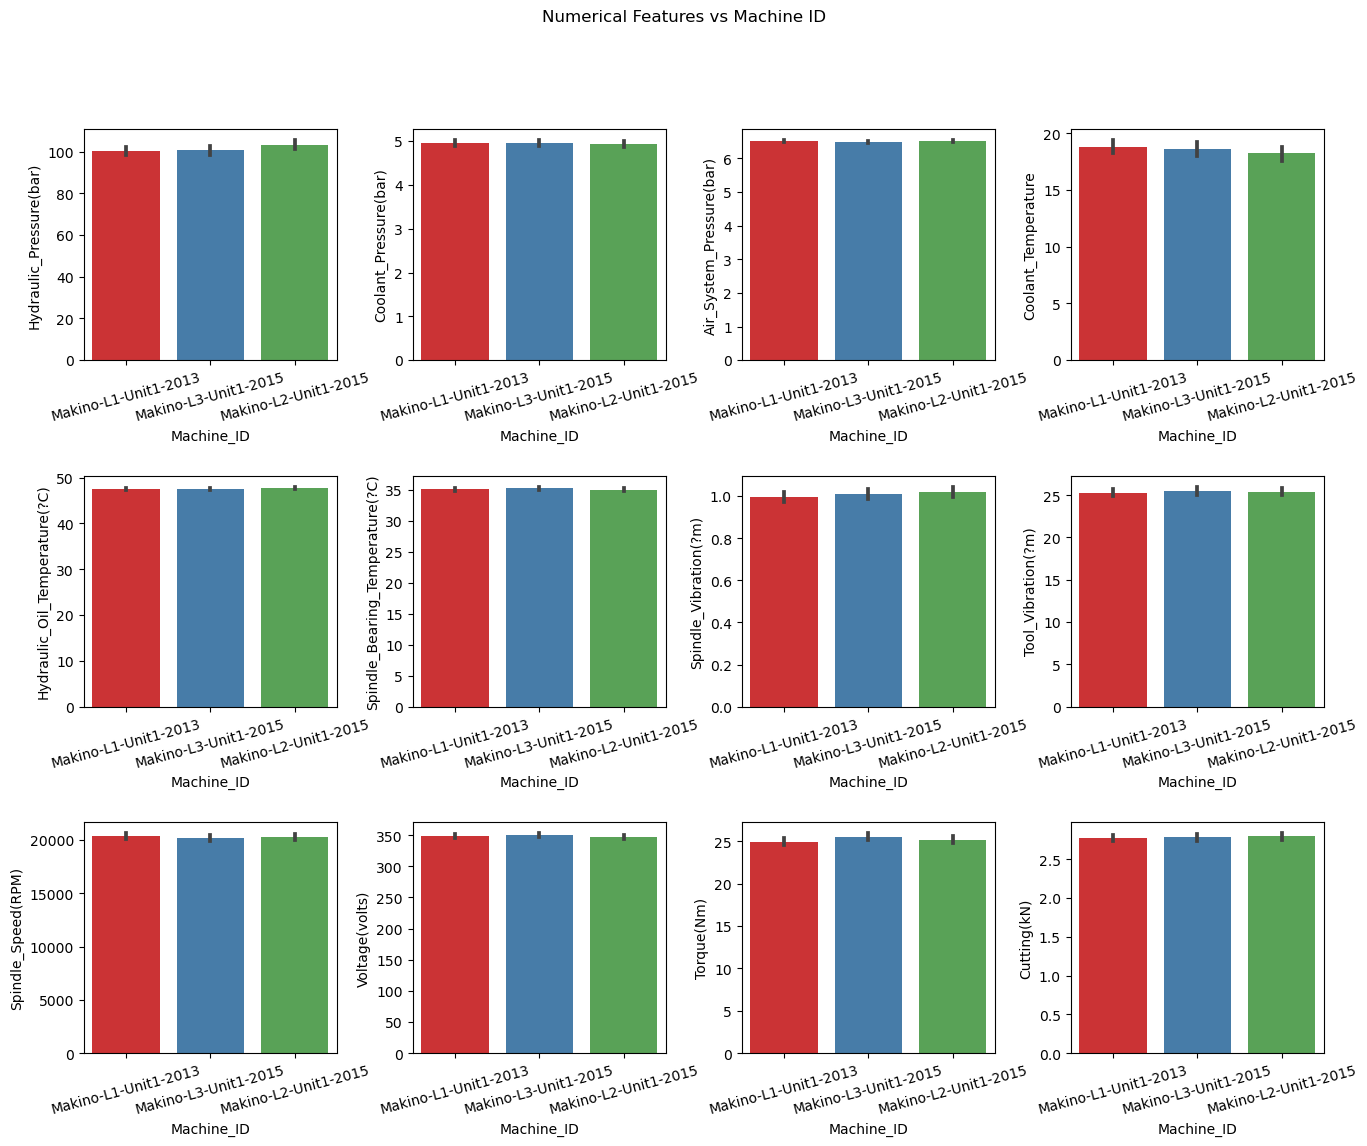

In [21]:
plt.subplots(3,4,figsize=(16,12))
plt.subplots_adjust(wspace=0.3,hspace=0.5)

columns = ['Hydraulic_Pressure(bar)','Coolant_Pressure(bar)', 'Air_System_Pressure(bar)','Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)',
    'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)','Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)','Torque(Nm)','Cutting(kN)']

k = 1
for i in columns:
    plt.subplot(3,4,k)
    sns.barplot(y = i, x = 'Machine_ID', data = machines_df, palette='Set1')
    plt.xticks(rotation = 15)
    k += 1

plt.suptitle('Numerical Features vs Machine ID')
plt.show()

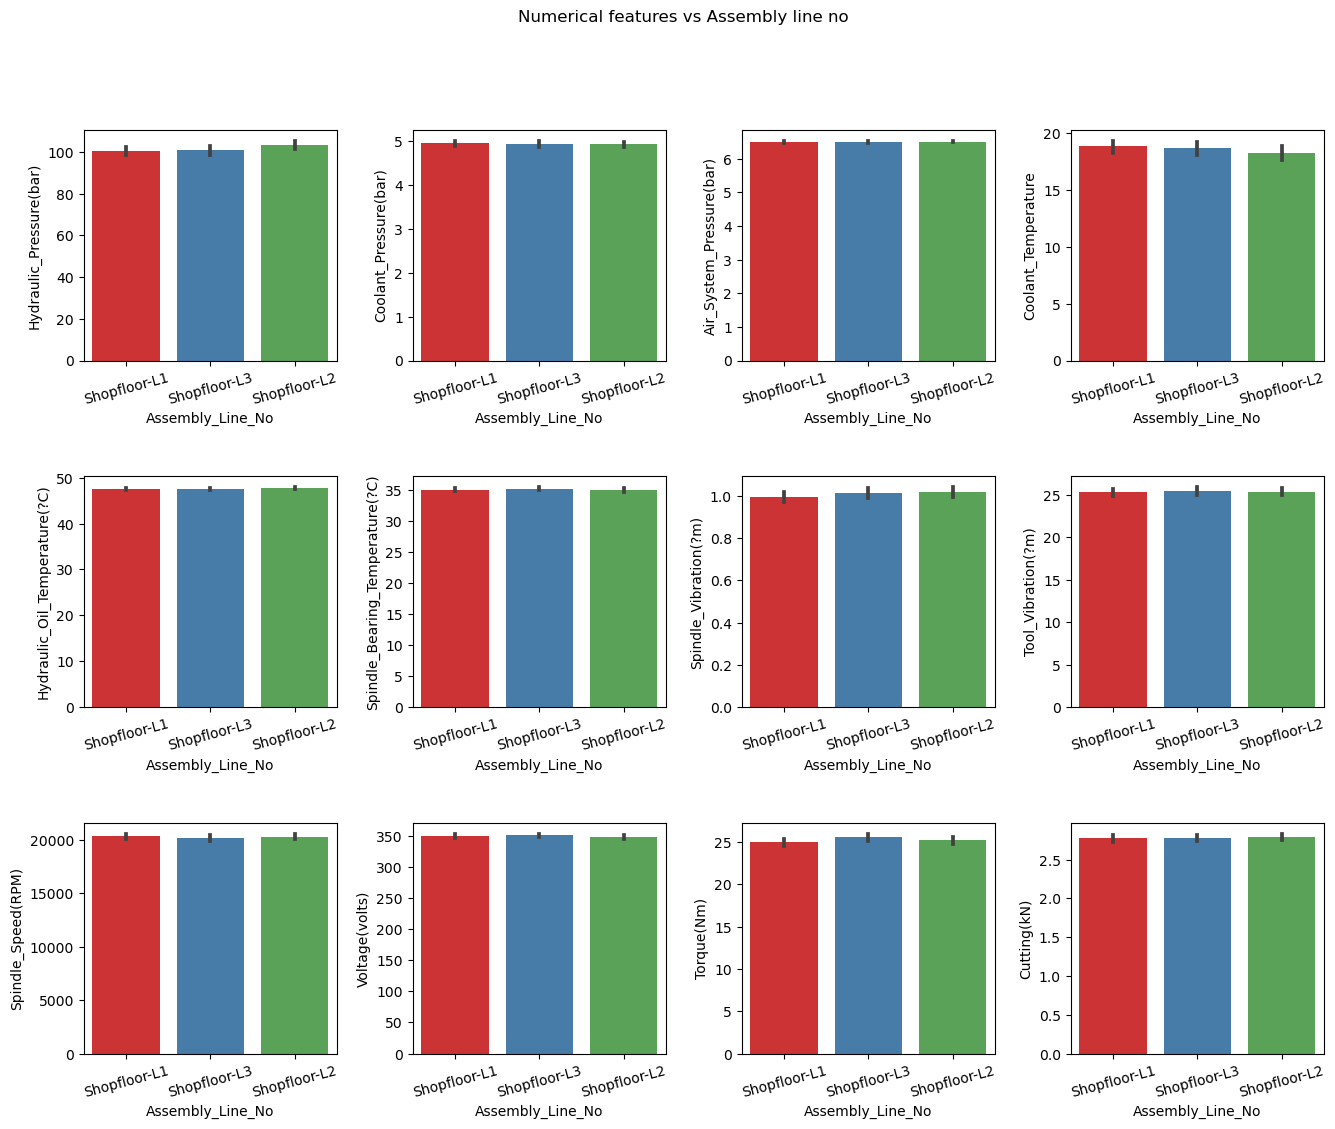

In [22]:
plt.subplots(3,4,figsize=(16,12))
plt.subplots_adjust(wspace=0.3,hspace=0.5)

columns = ['Hydraulic_Pressure(bar)','Coolant_Pressure(bar)', 'Air_System_Pressure(bar)','Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)',
    'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)','Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)','Torque(Nm)','Cutting(kN)']

k = 1
for i in columns:
    plt.subplot(3,4,k)
    sns.barplot(y = i, x = 'Assembly_Line_No', data = machines_df, palette='Set1')
    plt.xticks(rotation = 15)
    k += 1

plt.suptitle('Numerical features vs Assembly line no')
plt.show()

#### Columns : 'Machine_ID', 'Assembly_Line_No', 'Downtime'

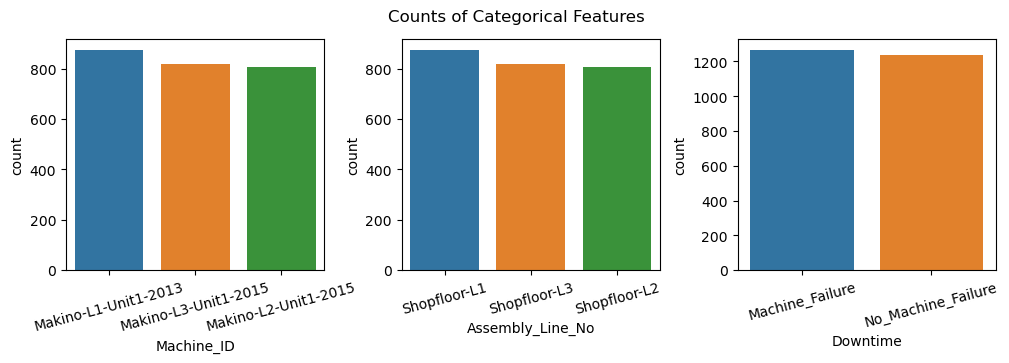

In [23]:
plt.subplots(1,3,figsize=(12,3))
plt.subplots_adjust(wspace=0.3)

columns = ['Machine_ID', 'Assembly_Line_No', 'Downtime']

k = 1
for i in columns:
    plt.subplot(1,3,k)
    sns.countplot(x = i, data = machines_df)
    plt.xticks(rotation = 15)
    k += 1

plt.suptitle('Counts of Categorical Features')
plt.show()

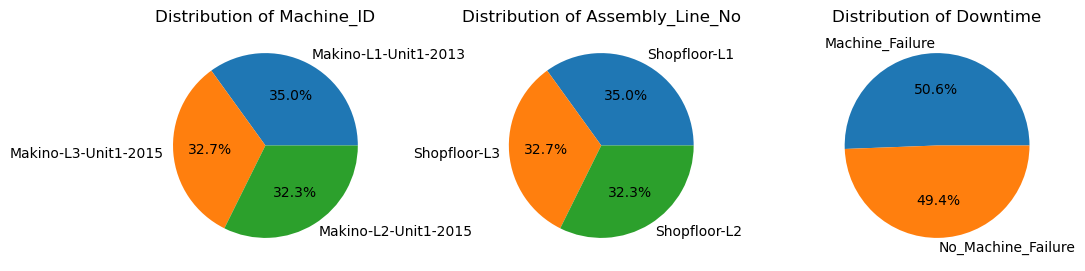

In [24]:
plt.subplots(1,3,figsize=(12,3))
plt.subplots_adjust(wspace=0.3)

columns = ['Machine_ID', 'Assembly_Line_No', 'Downtime']

k = 1
for i in columns:
    col_dict = dict(machines_df[i].value_counts())
    plt.subplot(1,3,k)
    plt.pie(x = col_dict.values(), labels=col_dict.keys(), autopct='%1.1f%%')
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

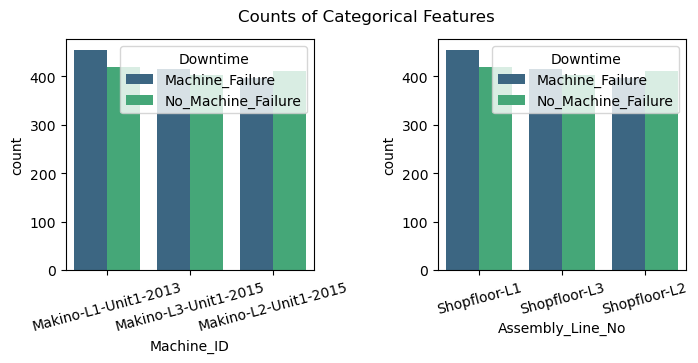

In [25]:
plt.subplots(1,2,figsize=(8,3))
plt.subplots_adjust(wspace=0.5)

columns = ['Machine_ID', 'Assembly_Line_No']

k = 1
for i in columns:
    plt.subplot(1,2,k)
    sns.countplot(x = i, data = machines_df, hue = 'Downtime', palette='viridis')
    plt.xticks(rotation = 15)
    k += 1

plt.suptitle('Counts of Categorical Features')
plt.show()

#### Correlation Map

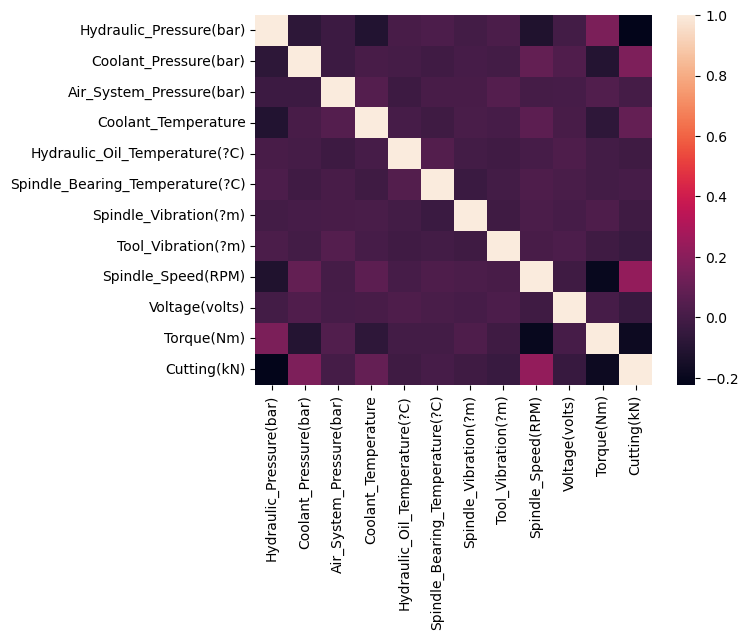

In [26]:
sns.heatmap(data = machines_df.corr(numeric_only=True))
plt.show()

## Data Preprocessing 

#### Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Y = le.fit_transform(machines_df['Downtime'])

#### Column Transformer

In [28]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

robust_scaler_pipe = Pipeline(steps=[('imputer', SimpleImputer()), ('rob_scaler', RobustScaler())])
min_max_scaler_pipe = Pipeline(steps=[('imputer', SimpleImputer()), ('minmax_scaler', MinMaxScaler())])
power_transformer_pipe = Pipeline(steps=[('imputer', SimpleImputer()), ('pow_transformer', PowerTransformer())])


ct = ColumnTransformer(transformers=[('Rob_Scaler', robust_scaler_pipe, ['Hydraulic_Pressure(bar)','Coolant_Pressure(bar)','Coolant_Temperature',
                                                                     'Spindle_Speed(RPM)','Torque(Nm)']), 
                                     ('Min_Max', min_max_scaler_pipe, ['Cutting(kN)']),
                                     ('pow_transformer', power_transformer_pipe, ['Air_System_Pressure(bar)','Hydraulic_Oil_Temperature(?C)',
                                                                              'Spindle_Bearing_Temperature(?C)','Spindle_Vibration(?m)',
                                                                              'Tool_Vibration(?m)','Voltage(volts)']),
                                     ('OneHot',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),['Machine_ID','Assembly_Line_No'])],
                       remainder='passthrough', sparse_threshold=0)
ct

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('Rob_Scaler',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('rob_scaler',
                                                  RobustScaler())]),
                                 ['Hydraulic_Pressure(bar)',
                                  'Coolant_Pressure(bar)',
                                  'Coolant_Temperature', 'Spindle_Speed(RPM)',
                                  'Torque(Nm)']),
                                ('Min_Max',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('minmax_scaler',
                                                  MinM...
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('pow_transformer',
                                                  PowerTransformer())]),
                                 ['Air_System_Pressure(bar)',
                                  'Hydraulic_Oil_Temperature(?C)',
                                  'Spindle_Bearing_Temperature(?C)',
                                  'Spindle_Vibration(?m)', 'Tool_Vibration(?m)',
                                  'Voltage(volts)']),
                                ('OneHot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Machine_ID', 'Assembly_Line_No'])])

## Data Splitting

In [29]:
X = machines_df.drop(columns='Downtime')

X.shape, Y.shape

((2500, 14), (2500,))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((2000, 14), (2000,))

## Model Selection

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

models = {
    'log_reg': LogisticRegression(),
    'svm': SVC(),
    'knn': KNeighborsClassifier(),
    'dec_tree': DecisionTreeClassifier(),
    'ran_forest': RandomForestClassifier(),
    'ex_trees': ExtraTreesClassifier(),
    'gbm': GradientBoostingClassifier(),
    'hgbm': HistGradientBoostingClassifier()
}

#### Cross Validations

In [32]:
from sklearn.model_selection import cross_val_score

X_pr = ct.fit_transform(X)
scores_df = pd.DataFrame(index=models.keys(), columns=['Accuracies', 'Mean_Accuracy'])

for i in models.keys():
    scores = cross_val_score(models[i], X_pr, Y, cv = 5)
    scores_df.loc[i, 'Accuracies'] = scores
    scores_df.loc[i, 'Mean_Accuracy'] = scores.mean()
    print(f'{i} --> cross validated')

log_reg --> cross validated
svm --> cross validated
knn --> cross validated
dec_tree --> cross validated
ran_forest --> cross validated
ex_trees --> cross validated
gbm --> cross validated
hgbm --> cross validated


In [33]:
scores_df.sort_values(by = 'Mean_Accuracy', ascending=False)

Accuracies Mean_Accuracy
hgbm           [1.0, 0.95, 0.982, 0.992, 0.998]        0.9844
gbm          [0.998, 0.944, 0.98, 0.996, 0.996]        0.9828
ex_trees    [0.992, 0.936, 0.962, 0.988, 0.996]        0.9748
ran_forest     [0.998, 0.908, 0.96, 0.994, 1.0]         0.972
dec_tree     [0.97, 0.914, 0.956, 0.956, 0.976]        0.9544
svm         [0.876, 0.804, 0.868, 0.842, 0.888]        0.8556
log_reg      [0.872, 0.79, 0.858, 0.822, 0.878]         0.844
knn          [0.832, 0.784, 0.826, 0.812, 0.84]        0.8188

## Model Building

In [34]:
model = Pipeline(steps=[('transformer', ct), ('hgbm', HistGradientBoostingClassifier())])

model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('Rob_Scaler',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('rob_scaler',
                                                                   RobustScaler())]),
                                                  ['Hydraulic_Pressure(bar)',
                                                   'Coolant_Pressure(bar)',
                                                   'Coolant_Temperature',
                                                   'Spindle_Speed(RPM)',
                                                   'Torque(Nm)']),
                                                 ('Min_Max',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleI...
                                                                  ('pow_transformer',
                                                                   PowerTransformer())]),
                                                  ['Air_System_Pressure(bar)',
                                                   'Hydraulic_Oil_Temperature(?C)',
                                                   'Spindle_Bearing_Temperature(?C)',
                                                   'Spindle_Vibration(?m)',
                                                   'Tool_Vibration(?m)',
                                                   'Voltage(volts)']),
                                                 ('OneHot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Machine_ID',
                                                   'Assembly_Line_No'])])),
                ('hgbm', HistGradientBoostingClassifier())])

## Model Evaluation

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)
evaluation_df = pd.DataFrame(index=['accuracy_score','precision_score','recall_score','fbeta_score','roc_auc_score'], columns=['Score'])

evaluation_df.loc['accuracy_score','Score'] = accuracy_score(y_test, y_pred)
evaluation_df.loc['precision_score','Score'] = precision_score(y_test, y_pred, average='macro')
evaluation_df.loc['recall_score','Score'] = recall_score(y_test, y_pred, average='macro')
evaluation_df.loc['fbeta_score','Score'] = f1_score(y_test, y_pred)
evaluation_df.loc['roc_auc_score','Score'] = roc_auc_score(y_test, y_pred)

In [36]:
evaluation_df

Score
accuracy_score      0.982
precision_score   0.98154
recall_score     0.982354
fbeta_score      0.983178
roc_auc_score    0.982354